In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from matplotlib import style
import itertools
import seaborn as sns

In [2]:
dataset = pd.read_csv("cancer.csv");

In [3]:
dataset.head()

,Number of cancer test,Test 1 report,Test 2 report,Triceps skin fold thickness (mm),cancer vaccine,Body mass index (weight in kg/(height in m)^2),skin pores,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


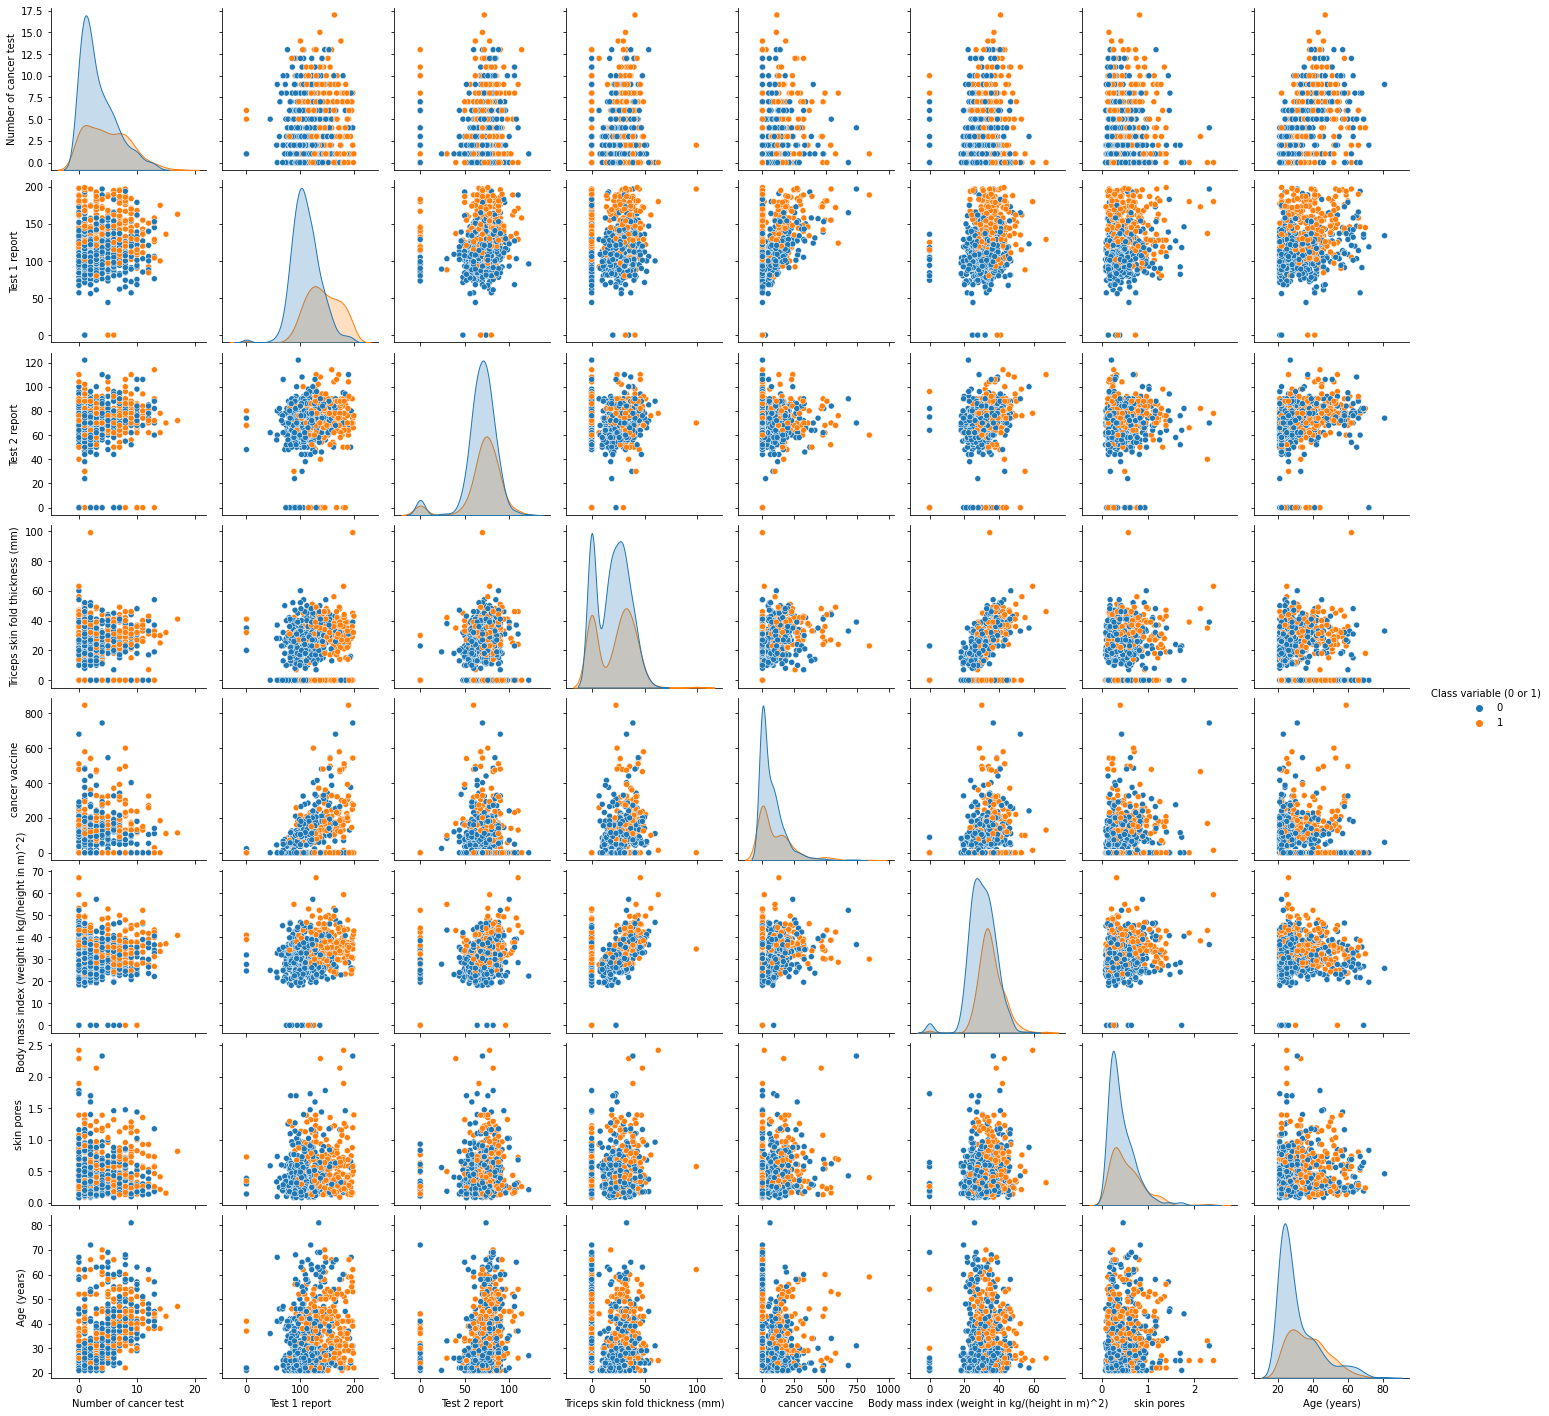

In [4]:
sns.pairplot(dataset, dropna=True, hue='Class variable (0 or 1)')

# Function for plotting confusion matrix


In [5]:
def plot_confusion_matrix(cm,topic,classes=['Positive','Negative'],cmap=plt.cm.Oranges):
	"""
	This function prints and plots the confusion matrix."""
	title='Confusion matrix of '
	title=title+topic


	plt.imshow(cm, interpolation='nearest', cmap=cmap)
	plt.title(title)
	plt.colorbar()
	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation=45)
	plt.yticks(tick_marks, classes)

	fmt = 'd'
	thresh = cm.max() / 2.
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, format(cm[i, j], fmt),
				 horizontalalignment="center",
				 color="white" if cm[i, j] > thresh else "black")

	plt.tight_layout()
	plt.ylabel('True label')
	plt.xlabel('Predicted label')
	plt.show()

# Splitting dataset into train and test

In [6]:
# spliting dataset into train and test dataset 
x = dataset.iloc[:, 0:-1] #contains  columns i.e attributes
y = dataset.iloc[:, -1] #contains labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 42)

# KNN

In [7]:
accl=[]
for i in range(1,20):
    classifier_KNN = KNeighborsClassifier(n_neighbors=i)
    classifier_KNN.fit(X_train, y_train)  #the model gets train using this 
    y_pred = classifier_KNN.predict(X_test) 
    accuracy = classifier_KNN.score(X_test, y_test)
    accl.append(accuracy)

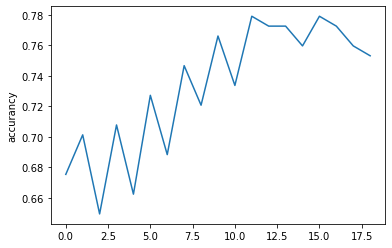

In [8]:

plt.plot(accl)
plt.ylabel('accurancy')
plt.show()

In [9]:
classifier_KNN = KNeighborsClassifier(n_neighbors=16)
classifier_KNN.fit(X_train, y_train)  #the model gets train using this 
y_pred = classifier_KNN.predict(X_test) 
accuracy = classifier_KNN.score(X_test, y_test)

In [10]:
accuracy

0.7792207792207793

In [11]:
conf1=confusion_matrix(y_test,y_pred)
conf1

array([[90,  9],
       [25, 30]], dtype=int64)

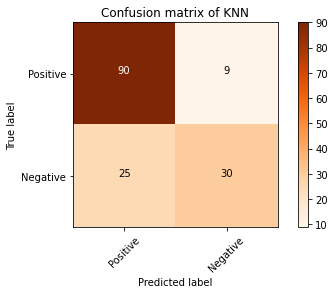

In [12]:
plot_confusion_matrix(conf1,topic='KNN')

# Naive Bayes

In [13]:
acc=0
#print("Executing Naive Bayes")
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
#Predict Output
y_pred2= model_nb.predict(X_test)
g=np.array(y_test)
for i in range(0,(len(y_pred2)-1)):
	if y_pred2[i]==g[i]:
		acc=acc+1


In [14]:
acc=(acc/(len(X_test)-1))*100

In [15]:
acc

76.47058823529412

In [16]:
conf2=confusion_matrix(y_test,y_pred2)
conf2

array([[79, 20],
       [16, 39]], dtype=int64)

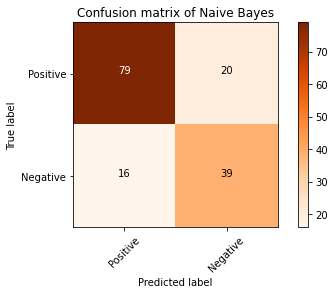

In [17]:
plot_confusion_matrix(conf2,topic='Naive Bayes')

# Decision Tree

In [18]:
acc3=0
#print("Executing Decision Tree")
model_dt = tree.DecisionTreeClassifier(criterion='gini')

# Train the model using the training sets and check score
model_dt.fit(X_train, y_train)

#model.score(X, y)
#Predict Output

y_pred3 = model_dt.predict(X_test)
g=np.array(y_test)
for i in range(0,(len(y_pred3)-1)):
	if y_pred3[i]==g[i]:
		acc3=acc3+1

acc3=(acc3/(len(X_test)-1))*100
#print("Decision tree accuracy : ",acc)
conf3=confusion_matrix(y_test,y_pred3)


In [19]:
acc3

77.12418300653596

In [20]:
conf3

array([[79, 20],
       [15, 40]], dtype=int64)

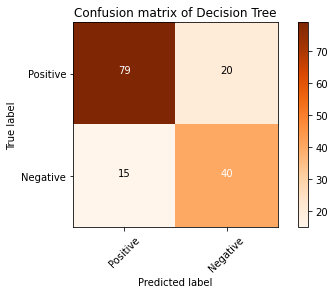

In [21]:
plot_confusion_matrix(conf3,topic='Decision Tree')

# Enter Patient Details

In [31]:
no_of_cancer_test=int(input('Enter number of cancer test:'))
test1=int(input('Enter test 1  report score:'))
test2=int(input('Enter test 2  report score:'))
thickness=int(input('Enter Triceps skin fold thickness (mm):'))
vaccine=int(input('Enter no of cancer vaccine:'))
bmi=float(input('Body mass index (weight in kg/(height in m)^2):'))
pores=float(input('Enter skin pores:'))
age=int(input('Enter age of patient:'))

Enter number of cancer test:3
Enter test 1  report score:126
Enter test 2  report score:88
Enter Triceps skin fold thickness (mm):41
Enter no of cancer vaccine:235
Body mass index (weight in kg/(height in m)^2):39.3
Enter skin pores:0.704
Enter age of patient:27


In [32]:
data_t={'Number of cancer test':[no_of_cancer_test],'Test 1 report':[test1],'Test 2 report':[test2],'Triceps skin fold thickness (mm)':[thickness],'cancer vaccine':[vaccine],'Body mass index (weight in kg/(height in m)^2)':[bmi],'skin pores':[pores],'Age (years)':[age]}

In [33]:
df = pd.DataFrame(data_t)
y_p = classifier_KNN.predict(df)
if (y_p[0]==1):
    print('Patient have cancer')
else:
    print('Patient dont have cancer')

Patient dont have cancer
